In [3]:
import pandas as pd
from tabulate import tabulate

# Averaged Metrics
avg_metrics = {
    "precision": {"glioma": (0.81 + 0.97 + 0.99) / 3, 
                  "meningioma": (0.83 + 0.80 + 0.72) / 3, 
                  "notumor": (0.98 + 0.99 + 0.99) / 3, 
                  "pituitary": (0.98 + 0.85 + 0.96) / 3},
    "recall": {"glioma": (0.97 + 0.86 + 0.77) / 3, 
               "meningioma": (0.69 + 0.92 + 0.94) / 3, 
               "notumor": (0.99 + 0.99 + 0.99) / 3, 
               "pituitary": (0.90 + 0.97 + 0.98) / 3},
    "f1-score": {"glioma": (0.89 + 0.91 + 0.87) / 3, 
                 "meningioma": (0.75 + 0.86 + 0.82) / 3, 
                 "notumor": (0.98 + 0.99 + 0.99) / 3, 
                 "pituitary": (0.94 + 0.96 + 0.97) / 3}
}

accuracy = (0.90 + 0.93 + 0.91) / 3

# Creating a DataFrame from the averaged metrics
avg_metrics_df = pd.DataFrame(avg_metrics)

# Calculating the macro averages
macro_precision = avg_metrics_df['precision'].mean()
macro_recall = avg_metrics_df['recall'].mean()
macro_f1_score = avg_metrics_df['f1-score'].mean()

# Creating a DataFrame for macro averages with one row
macro_avg_df = pd.DataFrame({"precision": [macro_precision], "recall": [macro_recall], "f1-score": [macro_f1_score]}, index=["Macro Average"])

# Formatting the DataFrames
formatted_avg_metrics_df = avg_metrics_df.applymap(lambda x: f'{x:.2f}' if isinstance(x, float) else x)
formatted_macro_avg_df = macro_avg_df.applymap(lambda x: f'{x:.2f}' if isinstance(x, float) else x)

# Printing the table using tabulate
classification_report = tabulate(formatted_avg_metrics_df, headers='keys', tablefmt='pipe', numalign="right", floatfmt=".2f")
macro_average_report = tabulate(formatted_macro_avg_df, headers='keys', tablefmt='pipe', numalign="right")

print("Average classification report (3 different seeds):")
print("----------------------------------------------------")
print(classification_report)
print("----------------------------------------------------")
print("\n")
print("-------------------------------------------------------")
print(macro_average_report)
print("-------------------------------------------------------")
print(f"\nAccuracy: {accuracy:.0%}")

Average classification report (3 different seeds):
----------------------------------------------------
|            |   precision |   recall |   f1-score |
|:-----------|------------:|---------:|-----------:|
| glioma     |        0.92 |     0.87 |       0.89 |
| meningioma |        0.78 |     0.85 |       0.81 |
| notumor    |        0.99 |     0.99 |       0.99 |
| pituitary  |        0.93 |     0.95 |       0.96 |
----------------------------------------------------


-------------------------------------------------------
|               |   precision |   recall |   f1-score |
|:--------------|------------:|---------:|-----------:|
| Macro Average |        0.91 |     0.91 |       0.91 |
-------------------------------------------------------

Accuracy: 91%


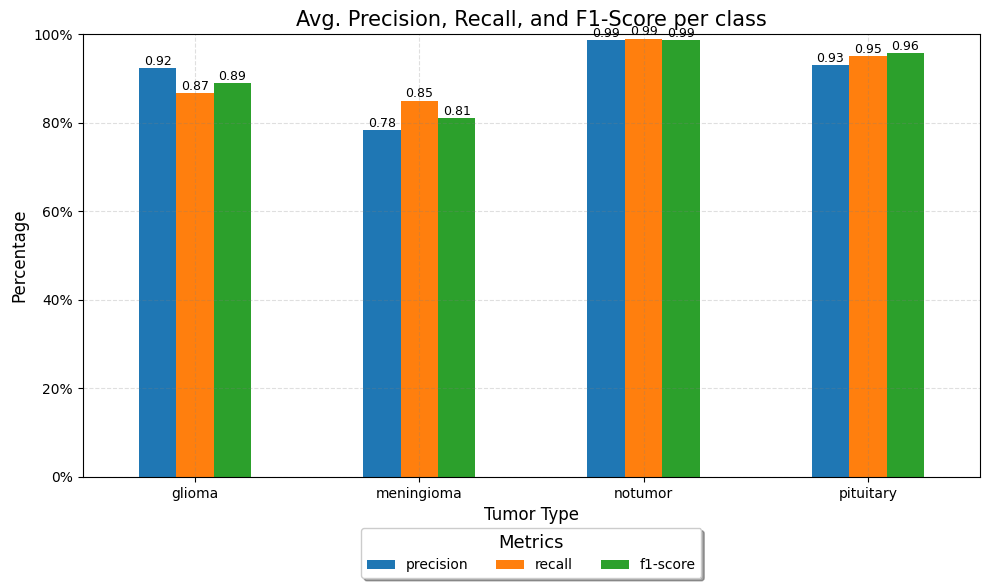

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = avg_metrics_df.plot(kind='bar', ax=plt.gca(), color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Adding titles and labels
plt.title('Avg. Precision, Recall, and F1-Score per class', fontsize=15)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Tumor Type', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Setting legend in the middle bottom
plt.legend(title='Metrics', fontsize=10, title_fontsize='13', loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=3)

# Setting limits and grid
plt.ylim(0, 1)  # Scaling y-axis to percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))  # Formatting y-axis as percentage
plt.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Adding data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', rotation=0, xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

/tmp/ipykernel_664394/757632462.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


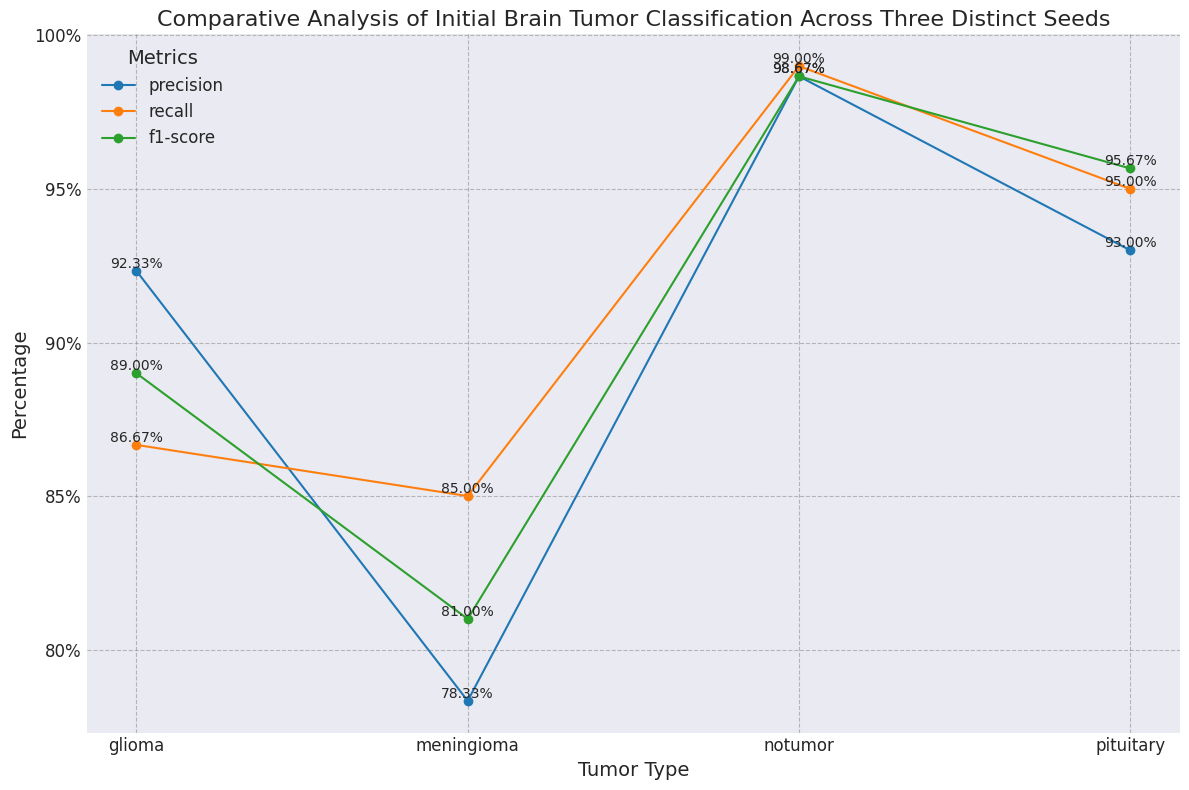

In [5]:
# Setting the style for the plot
plt.style.use('seaborn-darkgrid')

# Creating a new figure
plt.figure(figsize=(12, 8))

# Plotting each metric as a separate line
for column in avg_metrics_df.columns:
    plt.plot(avg_metrics_df[column], marker='o', label=column)

# Adding titles and labels
plt.title('Comparative Analysis of Initial Brain Tumor Classification Across Three Distinct Seeds', fontsize=16)
plt.xlabel('Tumor Type', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Adding legend
plt.legend(title='Metrics', fontsize=12, title_fontsize=14)

# Formatting y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))

# Adding grid
plt.grid(True, linestyle='--', color='grey', alpha=.5)

# Adding annotations for clarity
for i, row in avg_metrics_df.iterrows():
    for col in avg_metrics_df.columns:
        plt.text(i, row[col], f"{row[col]:.2%}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
